# Загрузка данных

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
from sklearn.datasets import load_iris
iris=load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Визуализация iris

Пункты 1 и 2

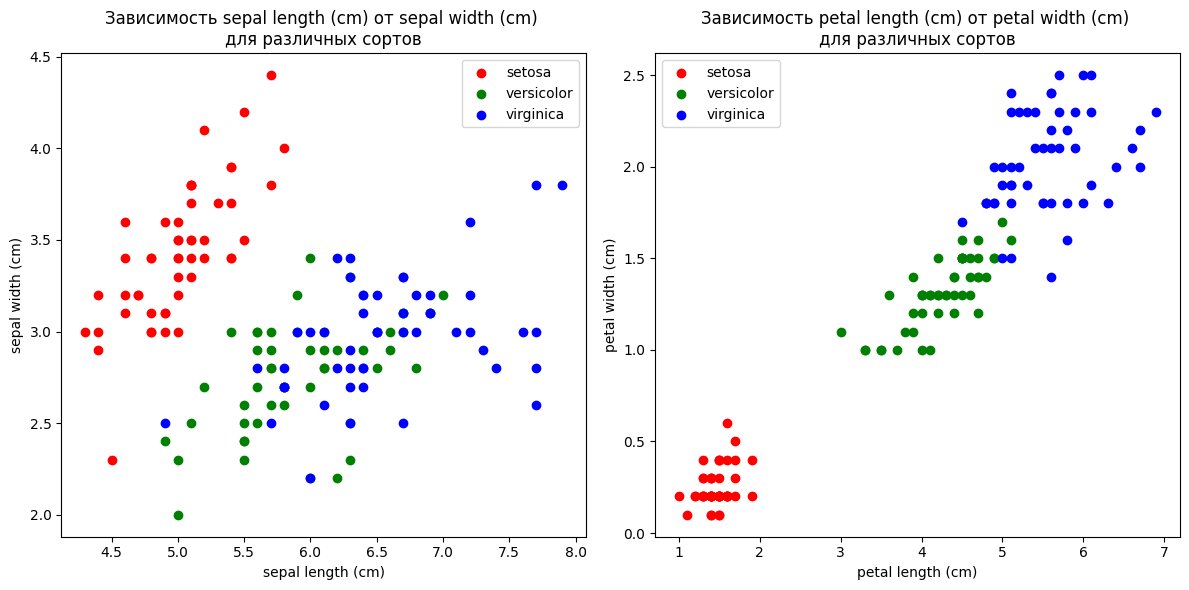

In [36]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
x_col='sepal length (cm)'
y_col='sepal width (cm)'
x_y_cols=[['sepal length (cm)','sepal width (cm)'],['petal length (cm)','petal width (cm)']]
i=0
for xy_set in x_y_cols:
    axes[i].scatter(df.loc[df['target']==0][xy_set[0]],df.loc[df['target']==0][xy_set[1]],color='red', label=iris.target_names[0])
    axes[i].scatter(df.loc[df['target']==1,xy_set[0]],df.loc[df['target']==1,xy_set[1]],color='green', label=iris.target_names[1])
    axes[i].scatter(df.loc[df['target']==2,xy_set[0]],df.loc[df['target']==2,xy_set[1]],color='blue', label=iris.target_names[2])

    axes[i].set_title(f'Зависимость {xy_set[0]} от {xy_set[1]} \nдля различных сортов')
    axes[i].set_xlabel(xy_set[0])
    axes[i].set_ylabel(xy_set[1])
    axes[i].legend()
    i+=1

plt.tight_layout()
plt.show()

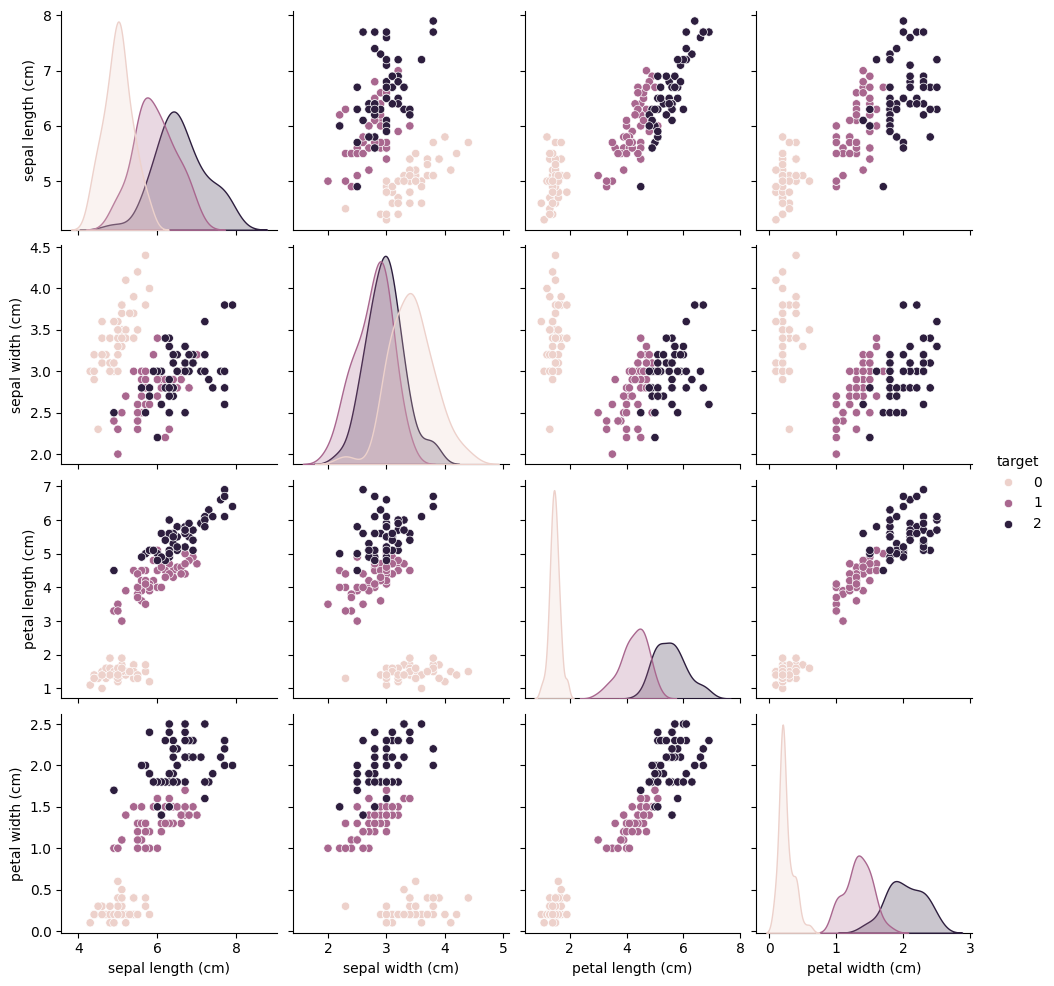

In [38]:
sns.pairplot(df, hue='target')

### Классификация iris

Пункты 3, 4

In [41]:
df_1=df.loc[(df['target']==0)|(df['target']==1)]
df_2=df.loc[(df['target']==1)|(df['target']==2)]

X_1=df_1.copy()
y_1=X_1.pop('target')

X_2=df_2.copy()
y_2=X_2.pop('target')

from sklearn.model_selection import train_test_split 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=0)


Пункт 5-8

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
clf = LogisticRegression(random_state=0)
clf.fit(X_train_1,y_train_1)
y_pred_1=clf.predict(X_test_1)

clf.fit(X_train_2,y_train_2)
y_pred_2=clf.predict(X_test_2)

print(f'Для датасета 1 показатели точности модели\nROC_AUC:{roc_auc_score(y_pred_1,y_test_1)}\nAccuracy:{accuracy_score(y_pred_1,y_test_1)}\nF1-score:{f1_score(y_pred_1,y_test_1)}')
print('------------------------------')
print(f'Для датасета 2 показатели точности модели\nROC_AUC:{roc_auc_score(y_pred_2,y_test_2)}\nAccuracy:{accuracy_score(y_pred_2,y_test_2)}\nF1-score:{f1_score(y_pred_2,y_test_2)}')


Для датасета 1 показатели точности модели
ROC_AUC:1.0
Accuracy:1.0
F1-score:1.0
------------------------------
Для датасета 2 показатели точности модели
ROC_AUC:0.9166666666666667
Accuracy:0.9
F1-score:0.8888888888888888


### Самостоятельная классификация

In [116]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
df=pd.DataFrame({'feat_1':X[:,0],'feat_2':X[:,1],'target':y})
df.head()

,feat_1,feat_2,target
0,1.536830,-1.398694,1
1,1.369176,-0.637344,1
2,0.502318,-0.459105,1
3,1.833193,-1.298082,1
4,1.042356,1.121529,0


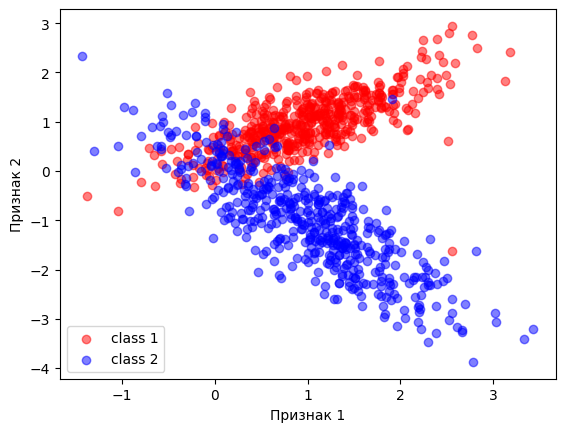

In [117]:
temp_df=df.loc[df['target']==0]
plt.scatter(temp_df['feat_1'],temp_df['feat_2'],color='red',label='class 1',alpha=0.5)
temp_df=df.loc[df['target']==1]
plt.scatter(temp_df['feat_1'],temp_df['feat_2'],color='blue',label='class 2',alpha=0.5)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf=LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(f'Для сгенерированного датасета показатели точности модели\nROC_AUC:{roc_auc_score(y_pred,y_test)}\nAccuracy:{accuracy_score(y_pred,y_test)}\nF1-score:{f1_score(y_pred,y_test)}')

Для сгенерированного датасета показатели точности модели
ROC_AUC:0.925683114803323
Accuracy:0.925
F1-score:0.9253731343283582


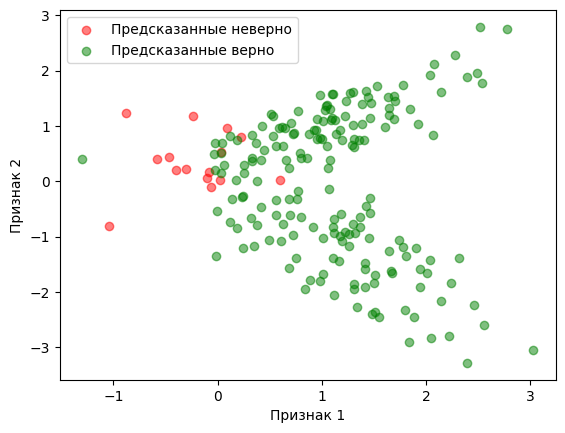

In [119]:
res=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
res['Correct']=res['Actual']^res['Predicted']^1
res['feat_1']=X_test[:,0]
res['feat_2']=X_test[:,1]

temp_df=res.loc[res['Correct']==0]
plt.scatter(temp_df['feat_1'],temp_df['feat_2'],color='red',label='Предсказанные неверно',alpha=0.5)
temp_df=res.loc[res['Correct']==1]
plt.scatter(temp_df['feat_1'],temp_df['feat_2'],color='green',label='Предсказанные верно',alpha=0.5)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()